# TransNet: A deep network for fast detection of common shot transitions
This repository contains code for paper *TransNet: A deep network for fast detection of common shot transitions*.

If you use it in your work, please cite:


    @article{soucek2019transnet,
        title={TransNet: A deep network for fast detection of common shot transitions},
        author={Sou{\v{c}}ek, Tom{\'a}{\v{s}} and Moravec, Jaroslav and Loko{\v{c}}, Jakub},
        journal={arXiv preprint arXiv:1906.03363},
        year={2019}
    }

## How to use it?

Firstly, *tensorflow* needs to be installed.
Do so by doing:

    pip install tensorflow

If you want to run **TransNet** directly on video files, *ffmpeg* needs to be installed as well:

    pip install ffmpeg-python

You can also install *pillow* for visualization:

    pip install pillow

    
Tested with *tensorflow* v1.12.0.

In [ ]:
!pip install tensorflow
!pip install ffmpeg-python
!pip install pillow

In [1]:
import ffmpeg
import numpy as np
import tensorflow as tf

from sbd import Params, sbd
from transnet_utils import draw_video_with_predictions, scenes_from_predictions

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# initialize the network
params = Params()
params.CHECKPOINT_PATH = "./model/transnet_model-F16_L3_S2_D256"

net = sbd(params)

Creating Build
           Input (?, ?, 27, 48, 3)
           SDDCNN_1
           > DDCNN_1 (?, ?, 27, 48, 64)
           > DDCNN_2 (?, ?, 27, 48, 64)
           MaxPool (?, ?, 13, 24, 64)
           SDDCNN_2
           > DDCNN_1 (?, ?, 13, 24, 128)
           > DDCNN_2 (?, ?, 13, 24, 128)
           MaxPool (?, ?, 6, 12, 128)
           SDDCNN_3
           > DDCNN_1 (?, ?, 6, 12, 256)
           > DDCNN_2 (?, ?, 6, 12, 256)
           MaxPool (?, ?, 3, 6, 256)
           Flatten (?, ?, 4608)
           Dense (?, ?, 256)
           Logits (?, ?, 2)
           Predictions (?, ?)
Network built.
Found 4614850 trainable parameters.
INFO:tensorflow:Restoring parameters from ./model/transnet_model-F16_L3_S2_D256
Parameters restored from 'transnet_model-F16_L3_S2_D256'.


In [4]:
# export video into numpy array using ffmpeg
video_stream, err = (
    ffmpeg
    .input('test.mp4')
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(params.INPUT_WIDTH, params.INPUT_HEIGHT))
    .run(capture_stdout=True)
)
video = np.frombuffer(video_stream, np.uint8).reshape([-1, params.INPUT_HEIGHT, params.INPUT_WIDTH, 3])

In [5]:
# predict transitions using the neural network
predictions = net.predict_video(video)

<class 'numpy.ndarray'>
Processing video frames 50/544<class 'numpy.ndarray'>
Processing video frames 100/544<class 'numpy.ndarray'>
Processing video frames 150/544<class 'numpy.ndarray'>
Processing video frames 200/544<class 'numpy.ndarray'>
Processing video frames 250/544<class 'numpy.ndarray'>
Processing video frames 300/544<class 'numpy.ndarray'>
Processing video frames 350/544<class 'numpy.ndarray'>
Processing video frames 400/544<class 'numpy.ndarray'>
Processing video frames 450/544<class 'numpy.ndarray'>
Processing video frames 500/544<class 'numpy.ndarray'>
Processing video frames 544/544


In [6]:
print(predictions.shape)

(544,)


In [ ]:
# plot all 64 maps in an 8x8 squares
from matplotlib import pyplot as plt

for i in range(30, 35):
    square = 16
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(predictions[i, :, :, ix-1])
            #plt.imshow(predictions[0, :, :, ix-1])
            ix += 1
    # show the figure
    plt.show()
    
# square = 16
# ix = 1
# for _ in range(square):
#     for _ in range(square):
#             # specify subplot and turn of axis
#             ax = plt.subplot(square, square, ix)
#             ax.set_xticks([])
#             ax.set_yticks([])
#             # plot filter channel in grayscale
#             plt.imshow(predictions[530, :, :, ix-1])
#             #plt.imshow(predictions[0, :, :, ix-1])
#             ix += 1
#     # show the figure
# plt.show()    

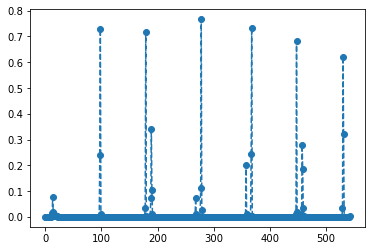

In [7]:
from matplotlib import pyplot as plt

plt.plot(predictions, marker='o', linestyle='--')
#plt.xlim(0,100)
plt.show()

## Visualize results

Function `draw_video_with_predictions` displays all video frames with confidence bars for each frame. The green bar is considered as detected shot boundary (predicted value exceeds the threshold), the red bar is shown otherwise.

Function `scenes_from_predictions` returns a list of scenes for a given video. Each scene is defined as a tuple of (start frame, end frame).

As described in the paper, the threshold of `0.1` is used.

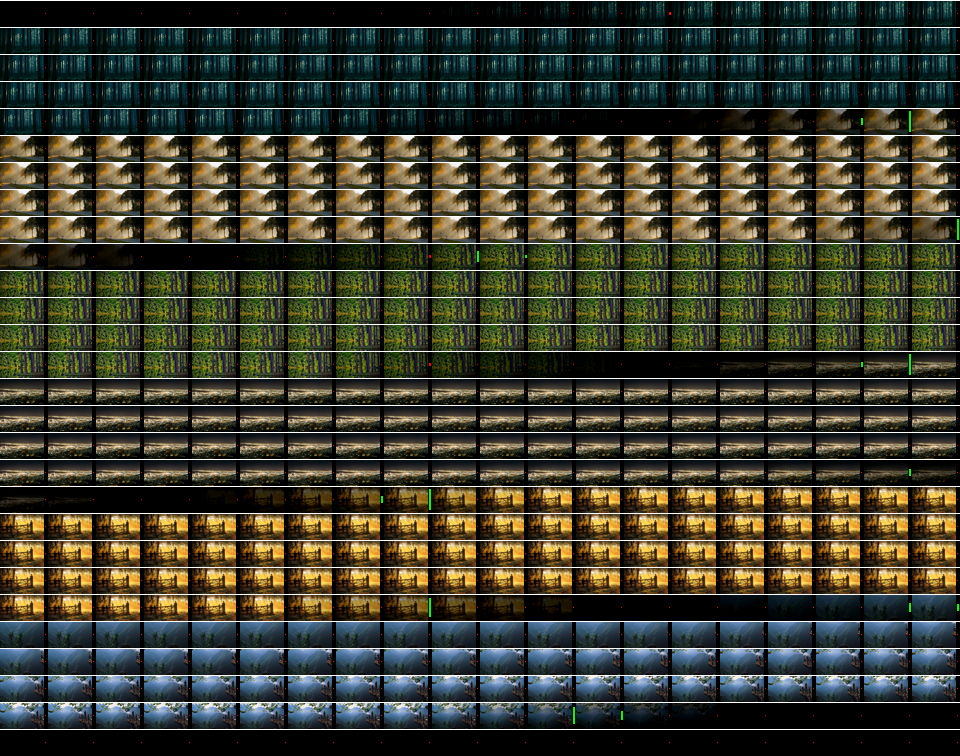

In [8]:
# For ilustration purposes, we show only 200 frames starting with frame number 8000.
draw_video_with_predictions(video[:], predictions[:], threshold=0.1)

In [9]:
# Generate list of scenes from predictions, returns tuples of (start frame, end frame)
scenes = scenes_from_predictions(predictions, threshold=0.1)

# For ilustration purposes, only the visualized scenes are shown.
scenes[:]

array([[  0,  97],
       [ 99, 179],
       [180, 189],
       [191, 277],
       [279, 358],
       [359, 367],
       [369, 448],
       [449, 458],
       [460, 531],
       [533, 543]])